## Лайфкодинг 3

## <span style="color:green">МАСЛЕНИЦА И СТАТИСТИКА!</span>

<img src="https://avatars.mds.yandex.net/get-zen_doc/1585195/pub_5e4cc023bb4a6d368b8dafa1_5e4e30e3f2b93d016c117de8/scale_1200" width="800">



In [1]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
calls = pd.read_csv('https://code.s3.yandex.net/datasets/returned.csv')


In [2]:
calls

,source,first,repeated
0,context,2933,96
1,email,885,136
2,smm,1653,139


In [1]:
# импортируем библиотеки
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
calls = pd.read_csv('https://code.s3.yandex.net/datasets/returned.csv')


# данных для проекта телеком
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')


pd.options.display.max_columns = 40
import warnings
warnings.filterwarnings('ignore')

In [2]:
def pivot_math_index(data, datetime, index, values, func):
    """
    Аргументы функции: data - изначальная таблица
    datetime - столбец с дата-временем из которого функция вычислит месяц
    index - индексы в будущей сводной таблице
    values - значения с которыми будут производится вычисление
    func - функция, производящее вычисление
    
    Функция возвращает сводную таблицу в которой просчитывает значения по месяцам, 
    для каждого пользователя
    """
    data[datetime] = pd.to_datetime(data[datetime], format = ('%Y-%m-%d'))
    data['month'] = data[datetime].dt.month
    pivot = data.pivot_table(index = [index,'month'], values = values, aggfunc = func, fill_value = 0)
    #pivot=pivot.reset_index()
    return pivot

In [3]:
calls_pivot_count = pivot_math_index(calls, 'call_date', 'user_id' ,'duration', 'sum')
calls_pivot_count

duration
user_id month          
1000    5        150.06
        6        158.90
        7        318.80
        8        389.87
        9        440.14
...                 ...
1498    10       232.63
1499    9         64.65
        10       429.91
        11       576.50
        12       465.16

[3174 rows x 1 columns]

In [4]:
messages_pivot_count = pivot_math_index(messages, 'message_date', 'user_id' ,'message_date', 'count')
messages_pivot_count

message_date
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
...                     ...
1498    10               42
1499    9                11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

In [5]:
calls_pivot_count.join(messages_pivot_count, how = 'outer')

duration  message_date
user_id month                        
1000    5        150.06          22.0
        6        158.90          60.0
        7        318.80          75.0
        8        389.87          81.0
        9        440.14          57.0
...                 ...           ...
1498    10       232.63          42.0
1499    9         64.65          11.0
        10       429.91          48.0
        11       576.50          59.0
        12       465.16          66.0

[3213 rows x 2 columns]

In [6]:
pd.concat([calls_pivot_count, messages_pivot_count])

duration  message_date
user_id month                        
1000    5        150.06           NaN
        6        158.90           NaN
        7        318.80           NaN
        8        389.87           NaN
        9        440.14           NaN
...                 ...           ...
1498    10          NaN          42.0
1499    9           NaN          11.0
        10          NaN          48.0
        11          NaN          59.0
        12          NaN          66.0

[5891 rows x 2 columns]

In [7]:
def pivot_math_noindex(data, datetime, index, values, func):
    """
    Аргументы функции: data - изначальная таблица
    datetime - столбец с дата-временем из которого функция вычислит месяц
    index - индексы в будущей сводной таблице
    values - значения с которыми будут производится вычисление
    func - функция, производящее вычисление
    
    Функция возвращает сводную таблицу в которой просчитывает значения по месяцам, 
    для каждого пользователя
    """
    data[datetime] = pd.to_datetime(data[datetime], format = ('%Y-%m-%d'))
    data['month'] = data[datetime].dt.month
    pivot = data.pivot_table(index = [index,'month'], values = values, aggfunc = func, fill_value = 0)
    pivot=pivot.reset_index()
    return pivot

In [8]:
calls_pivot_count = pivot_math_noindex(calls, 'call_date', 'user_id' ,'duration', 'sum')
messages_pivot_count = pivot_math_noindex(messages, 'message_date', 'user_id' ,'message_date', 'count')
internet_pivot_count = pivot_math_noindex(internet, 'session_date', 'user_id' ,'mb_used', 'sum')

In [9]:
revenue = calls_pivot_count.merge(messages_pivot_count, on=['user_id', 'month'], how='outer')
revenue = revenue.merge(internet_pivot_count, on=['user_id', 'month'], how='outer')
revenue = revenue.merge(users[['user_id', 'tariff','city']], on='user_id', how='left')
tariffs.rename(columns={'tariff_name':'tariff'}, inplace=True)
revenue = revenue.merge(tariffs, on = 'tariff',how = 'left')
revenue = revenue.fillna(0)
revenue

,user_id,month,duration,message_date,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.00,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3210,1489,10,0.00,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3211,1489,11,0.00,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3212,1489,12,0.00,35.0,17322.51,smart,Санкт-Петербург,50,15360,500,550,200,3,3


In [10]:
#revenue['minut_temp'] = (revenue['duration'] - revenue['minutes_included'])*revenue['rub_per_minute']
#revenue['mess_temp'] = (revenue['message_date'] - revenue['messages_included'])*revenue['rub_per_message']
#revenue['int_temp'] = (revenue['mb_used'] - revenue['mb_per_month_included'])/1024*revenue['rub_per_gb']
revenue['revenue_sum'] = ((revenue['duration'] - revenue['minutes_included'])*revenue['rub_per_minute'])\
    + ((revenue['message_date'] - revenue['messages_included'])*revenue['rub_per_message'])\
    + ((revenue['mb_used'] - revenue['mb_per_month_included'])/1024*revenue['rub_per_gb'])
revenue

,user_id,month,duration,message_date,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_sum
0,1000,5,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-7997.838926
1,1000,6,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-4877.715723
2,1000,7,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-6054.885547
3,1000,8,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-5970.155879
4,1000,9,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-5868.742324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.00,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3,-1193.394531
3210,1489,10,0.00,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3,-766.796875
3211,1489,11,0.00,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3,-1173.679687
3212,1489,12,0.00,35.0,17322.51,smart,Санкт-Петербург,50,15360,500,550,200,3,3,-1161.697266


In [11]:
revenue.loc[revenue['revenue_sum'] > 0, 'revenue_sum'] = revenue['revenue_sum']
revenue.loc[revenue['revenue_sum'] <= 0, 'revenue_sum'] = 0
revenue['revenue_sum'] = revenue['revenue_sum'] + revenue['rub_monthly_fee']
smart = revenue.query('tariff == "smart"')[['mb_used']].astype('int')
ultra = revenue.query('tariff == "ultra"')[['mb_used']].astype('int')

In [12]:
def my_bins(df,value):
    '''
    Сделаем функцию которая отобразит нужное количество корзин 
    '''    
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return  100
    elif df[value].max() > 1000:
        return  200
    else: return 20
    
def my_hist(df, col):
    '''
    А теперь перенесем все что мы делали в предыдущей части, перенесем в функцию)
    '''
    coef_bins = 0.005
    X_1 = df.loc[(df[col] >= df[col].quantile(.01))&(df[col] <= df[col].quantile(.99)), col]
    plt.figure(figsize =(6, 4))
    hist = X_1.plot(
                kind='hist', 
                bins=my_bins(df, col), 
                alpha=0.5, 
                ec='black',
                color='green',
                )
    X_1.plot(kind='kde', color='g')
    plt.axvline(x=X_1.median(),
                linewidth=3, 
                color='red', 
                linestyle='--')
    plt.axvline(x=X_1.mean(),
                linewidth=3, 
                color='b', 
                linestyle=':')
    plt.axvline(x=X_1.quantile(.05),
                linewidth=3, 
                color='y', 
                linestyle='--')
    plt.axvline(x=X_1.quantile(.95),
                linewidth=3, 
                color='y', 
                linestyle='--')
    plt.xlim(df[col].quantile(.01), df[col].quantile(.99))
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    plt.figure(figsize =(6, 4))
    X_1.plot(kind='kde', 
            alpha=0.5, 
            color='green',
            )
    plt.xlim(df[col].quantile(.01), df[col].quantile(.99))
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    #Проверка на нормальность распределения;
    from statsmodels.graphics.gofplots import qqplot
    qqplot(df[col], line='s')
    plt.title('Близость к нормальному распределению (красная линия)',  fontsize=12, color='black')
    plt.show()
    print('--------------------------------------------------------------')

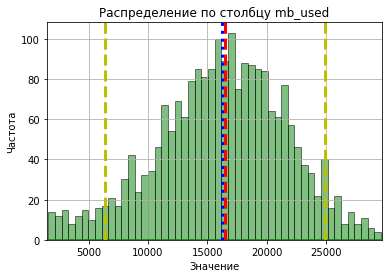

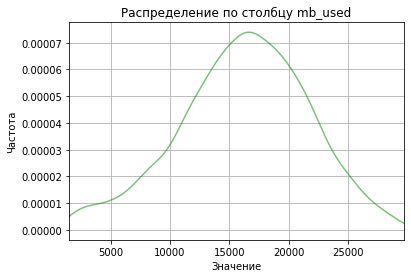

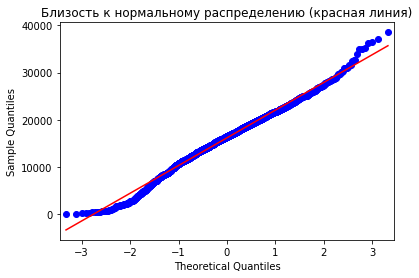

--------------------------------------------------------------


In [13]:
my_hist(smart,'mb_used')

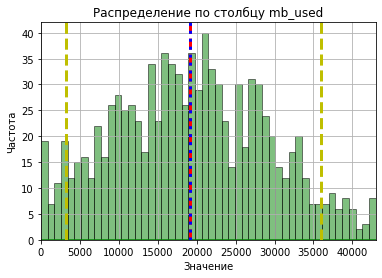

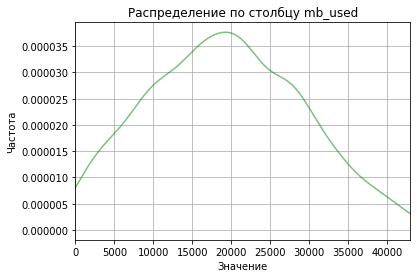

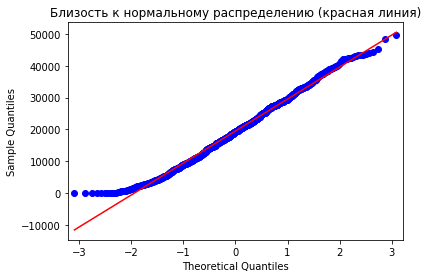

--------------------------------------------------------------


In [14]:
my_hist(ultra,'mb_used')

H0 - данные распределены нормально

H1 - данные распределены не нормально

In [15]:
alpha = 0.05

x,y = st.shapiro(smart['mb_used'])

print('p-значение:', y)

if (y < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.212522579180813e-09
Отвергаем нулевую гипотезу


In [16]:
def var_pr(df1, df2):
    x = round(df1.var()/df2.var()*100)
    if x >= 5:
        return False
    else:
        return True

In [17]:
var_pr(smart['mb_used'], ultra['mb_used'])

False

H0 - дисперсии выборок равны

H1 - дисперсии выборок не равны

In [18]:
alpha = 0.05

results = st.levene(smart['mb_used'], ultra['mb_used'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.345527795380078e-94
Отвергаем нулевую гипотезу


H0 - среднее значение используемых пользователями мегабайт по тарифам СМАРТ и УЛЬТРА равны

H1- среднее значение используемых пользователями мегабайт по тарифам СМАРТ и УЛЬТРА различны

In [19]:
alpha = 0.05

results = st.ttest_ind(
    smart['mb_used'], 
    ultra['mb_used'],
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 1.3944638509835038e-20
Отвергаем нулевую гипотезу


In [20]:
smart_mes = revenue.query('tariff == "smart"')[['message_date']].astype('int')
ultra_mes = revenue.query('tariff == "ultra"')[['message_date']].astype('int')

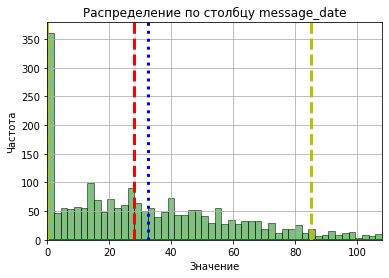

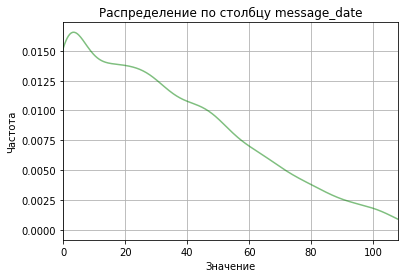

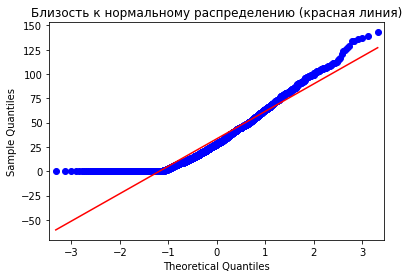

--------------------------------------------------------------


In [21]:
my_hist(smart_mes,'message_date')

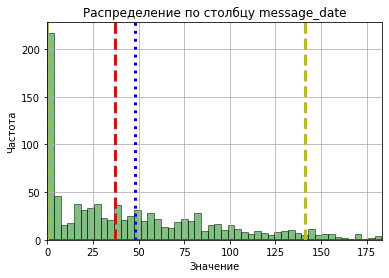

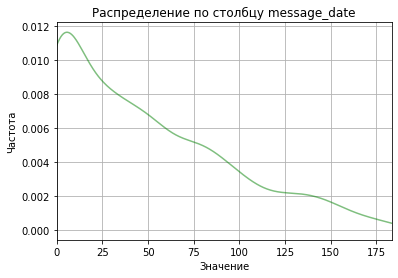

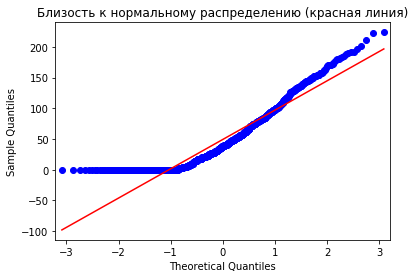

--------------------------------------------------------------


In [22]:
my_hist(ultra_mes,'message_date')

H0 - распределения равны

H1 - распределения не равны

In [23]:
alpha = 0.05

results = st.mannwhitneyu(
    smart_mes['message_date'], 
    ultra_mes['message_date'], alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.5519255246588172e-09
Отвергаем нулевую гипотезу
